<h1 style="color:blue">House Price Prediction Analysis - Step by Step Breakdown</h1>

<h1 style = "color:white">Section 1: Import Libraries</h1>

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

<h1 style = "color:white">Section 2: Create Synthetic Dataset</h1>

In [39]:
# Create synthetic house price dataset
np.random.seed(42)
n_samples = 1000

# Generate features
house_size = np.random.normal(2000, 500, n_samples)
house_size = np.clip(house_size, 800, 5000)  # Clip to reasonable range

bedrooms = np.random.choice([2, 3, 4, 5, 6], n_samples, p=[0.1, 0.3, 0.4, 0.15, 0.05])
bathrooms = np.random.choice([1, 2, 3, 4], n_samples, p=[0.2, 0.5, 0.25, 0.05])
house_age = np.random.exponential(15, n_samples)
house_age = np.clip(house_age, 0, 50)

garage_size = np.random.choice([0, 1, 2, 3], n_samples, p=[0.1, 0.3, 0.5, 0.1])
lot_size = np.random.normal(8000, 2000, n_samples)
lot_size = np.clip(lot_size, 3000, 20000)

# Create realistic price based on features with some noise
base_price = (
    house_size * 120 +  # $120 per sq ft
    bedrooms * 15000 +  # $15k per bedroom
    bathrooms * 10000 + # $10k per bathroom
    garage_size * 8000 + # $8k per garage space
    lot_size * 5 -      # $5 per sq ft lot
    house_age * 1000 +  # Depreciation
    50000               # Base price
)

# Add noise to make it realistic
noise = np.random.normal(0, 20000, n_samples)
house_price = base_price + noise
house_price = np.clip(house_price, 100000, 800000)  # Reasonable price range

# Create DataFrame
df = pd.DataFrame({
    'house_size': house_size.round().astype(int),
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'house_age': house_age.round(1),
    'garage_size': garage_size,
    'lot_size': lot_size.round().astype(int),
    'price': house_price.round().astype(int)
})

<h1 style="color:white"> Convert Dataframe into CSV File (dataset) </h1>

In [40]:
# Save DataFrame to CSV
df = df.to_csv("house_prices.csv", index=False)

print("CSV file 'house_prices.csv' has been created successfully!")


CSV file 'house_prices.csv' has been created successfully!


<h1 style="color:white"> Load CSV DATASET </h1>

In [41]:
df = pd.read_csv("house_prices.csv")
df.head()

,house_size,bedrooms,bathrooms,house_age,garage_size,lot_size,price
0,2248,3,2,15.7,1,12698,433239
1,1931,3,1,1.2,1,6568,380665
2,2324,4,1,7.1,2,7167,425274
3,2762,4,2,24.4,2,7874,526944
4,1883,2,3,8.5,0,8792,358677


<h1 style="color:white">Check dataset shape </h1>

In [42]:
df.shape

(1000, 7)

<h1 style="color:white">Section 3: Data Exploration and Summary</h1> 

In [43]:
print("House Price Dataset")
print("="*50)
print(f"Dataset shape: {df.shape}")
print("\nFirst 10 rows:")
print(df.head(10))


House Price Dataset
Dataset shape: (1000, 7)

First 10 rows:
   house_size  bedrooms  bathrooms  house_age  garage_size  lot_size   price
0        2248         3          2       15.7            1     12698  433239
1        1931         3          1        1.2            1      6568  380665
2        2324         4          1        7.1            2      7167  425274
3        2762         4          2       24.4            2      7874  526944
4        1883         2          3        8.5            0      8792  358677
5        1883         5          2       50.0            3      8527  386761
6        2790         2          2       12.3            2     10568  502431
7        2384         4          2        5.8            2      3147  430146
8        1765         4          3        3.7            2      3226  343302
9        2271         5          2        6.5            0      7008  437548


In [44]:

print("\nDataset Statistics:")
df.describe()




Dataset Statistics:


,house_size,bedrooms,bathrooms,house_age,garage_size,lot_size,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2010.531000,3.768000,2.158000,14.027100,1.587000,7931.725000,406894.815000
std,487.262268,1.003585,0.799797,12.699412,0.805655,1978.490893,65091.703372
min,800.000000,2.000000,1.000000,0.000000,0.000000,3000.000000,180710.000000
25%,1676.500000,3.000000,2.000000,4.275000,1.000000,6627.000000,361533.750000
50%,2012.500000,4.000000,2.000000,10.100000,2.000000,8003.000000,408321.500000
75%,2324.000000,4.000000,3.000000,19.900000,2.000000,9305.000000,450414.250000
max,3926.000000,6.000000,4.000000,50.000000,3.000000,14226.000000,612034.000000


In [45]:
# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")



Missing values: 0


In [46]:

# Correlation analysis
print("\nFeature Correlations with Price:")
correlations = df.corr()['price'].drop('price').sort_values(ascending=False)
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.3f}")


Feature Correlations with Price:
house_size: 0.878
bedrooms: 0.223
bathrooms: 0.132
garage_size: 0.129
lot_size: 0.097
house_age: -0.197


<h1 style="color:white">Section 5: Data Preparation for Modeling</h1>

In [47]:
# Prepare data for modeling
X = df.drop('price', axis=1)
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nData Split:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")

# Feature scaling (optional for linear regression but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Data Split:
Training samples: 800
Testing samples: 200
Features: 6


<h1 style="color:white">Section 6: Model Training</h1>

In [48]:
# Create and train models
print("\nTraining Models...")
print("="*30)

# Model 1: Without scaling
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Model 2: With scaling
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)


Training Models...


<h1 style="color:white"> Section 7: Model Evaluation </h1>

In [49]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mse:,.2f}")
    print(f"Root Mean Squared Error: {rmse:,.2f}")
    print(f"Mean Absolute Error: {mae:,.2f}")
    print(f"R-squared Score: {r2:.4f}")
    print(f"Adjusted R-squared: {1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1):.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate both models
results1 = evaluate_model(y_test, y_pred1, "Model 1 (Without Scaling)")
results2 = evaluate_model(y_test, y_pred2, "Model 2 (With Scaling)")


Model 1 (Without Scaling) Performance:
Mean Squared Error: 428,453,475.55
Root Mean Squared Error: 20,699.12
Mean Absolute Error: 16,493.66
R-squared Score: 0.8991
Adjusted R-squared: 0.8959

Model 2 (With Scaling) Performance:
Mean Squared Error: 428,453,475.55
Root Mean Squared Error: 20,699.12
Mean Absolute Error: 16,493.66
R-squared Score: 0.8991
Adjusted R-squared: 0.8959


<h1 style ="color:white">Compare Actual Price and Predicted Prices (Results Interpretations)</h1>

In [50]:
# Combine actual inputs, actual price, and predictions into one table
comparison_df_full = X_test.copy()  # start with all input features
comparison_df_full["Actual Price"] = y_test
comparison_df_full["Predicted Price"] = y_pred1.round(2)
comparison_df_full["Residual"] = (y_test - y_pred1).round(2)

# Reset index for a clean table
comparison_df_full = comparison_df_full.reset_index(drop=True)

# Display first 20 rows
print("\nTest Set: Inputs, Actual vs Predicted Prices (Model 1)")
print("="*70)
print(comparison_df_full.head(5).to_string(index=False))



Test Set: Inputs, Actual vs Predicted Prices (Model 1)
 house_size  bedrooms  bathrooms  house_age  garage_size  lot_size  Actual Price  Predicted Price  Residual
       2272         4          1       26.0            2      7032        423715        416849.45   6865.55
       2491         6          1       50.0            2     10828        470743        464302.68   6440.32
       1080         3          2       50.0            2      7103        259510        249484.99  10025.01
       1713         4          3       39.1            1      3644        391194        335862.05  55331.95
       1438         3          2        4.9            1     10583        338026        342812.90  -4786.90


In [51]:
# Combine actual inputs, actual price, and Model 2 predictions into one table
comparison_df_model2 = X_test.copy()  # all input features
comparison_df_model2["Actual Price"] = y_test
comparison_df_model2["Predicted Price (Model 2)"] = y_pred2.round(2)
comparison_df_model2["Residual (Model 2)"] = (y_test - y_pred2).round(2)

# Reset index for a clean table
comparison_df_model2 = comparison_df_model2.reset_index(drop=True)

# Display first 20 rows
print("\nTest Set: Inputs, Actual vs Predicted Prices (Model 2)")
print("="*80)
print(comparison_df_model2.head(5).to_string(index=False))



Test Set: Inputs, Actual vs Predicted Prices (Model 2)
 house_size  bedrooms  bathrooms  house_age  garage_size  lot_size  Actual Price  Predicted Price (Model 2)  Residual (Model 2)
       2272         4          1       26.0            2      7032        423715                  416849.45             6865.55
       2491         6          1       50.0            2     10828        470743                  464302.68             6440.32
       1080         3          2       50.0            2      7103        259510                  249484.99            10025.01
       1713         4          3       39.1            1      3644        391194                  335862.05            55331.95
       1438         3          2        4.9            1     10583        338026                  342812.90            -4786.90


<h1 style="color:white">Section 8: Feature Importance Analysis</h1>

In [52]:
# Feature importance analysis
print(f"\nFeature Importance (Model 1 - Without Scaling):")
print("-" * 50)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_,
    'Abs_Coefficient': np.abs(model1.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:,.2f}")

print(f"\nIntercept: {model1.intercept_:,.2f}")


Feature Importance (Model 1 - Without Scaling):
--------------------------------------------------
bedrooms: 14,318.07
bathrooms: 10,520.62
garage_size: 8,477.63
house_age: -984.39
house_size: 117.66
lot_size: 4.39

Intercept: 59,477.67


<h1 style = "color:white">Section 9: Residual Analysis and Model Comparison</h1>

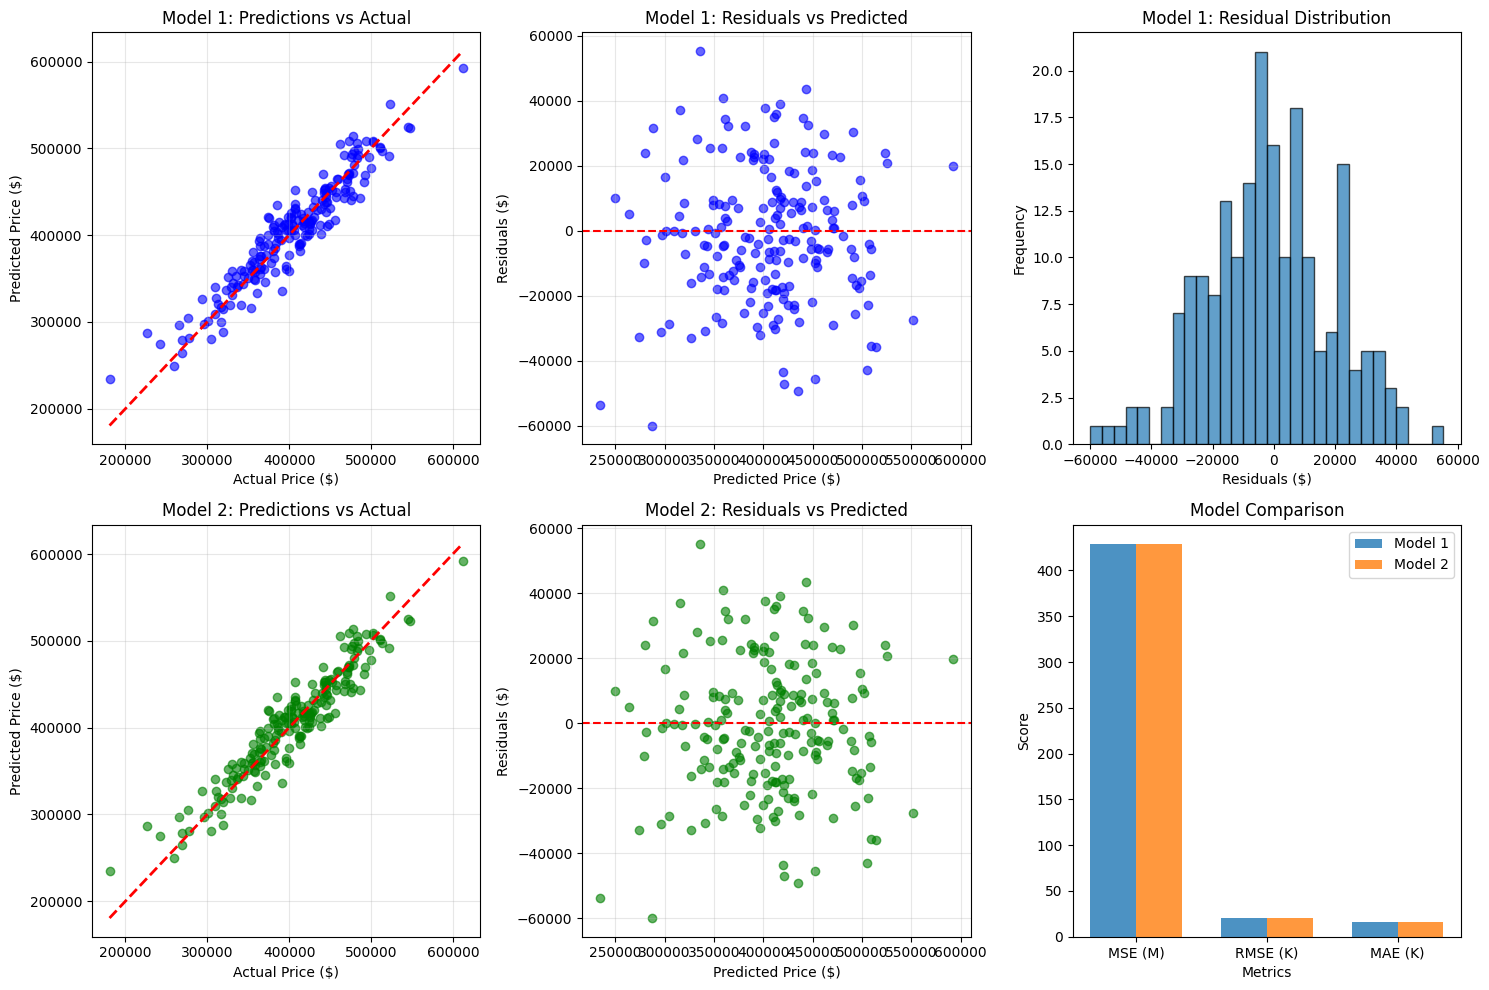

In [53]:
# Residual analysis
plt.figure(figsize=(15, 10))

# Predictions vs Actual (Model 1)
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred1, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Model 1: Predictions vs Actual')
plt.grid(True, alpha=0.3)

# Residuals vs Predicted (Model 1)
plt.subplot(2, 3, 2)
residuals1 = y_test - y_pred1
plt.scatter(y_pred1, residuals1, alpha=0.6, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Model 1: Residuals vs Predicted')
plt.grid(True, alpha=0.3)

# Residual distribution (Model 1)
plt.subplot(2, 3, 3)
plt.hist(residuals1, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals ($)')
plt.ylabel('Frequency')
plt.title('Model 1: Residual Distribution')

# Predictions vs Actual (Model 2)
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred2, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Model 2: Predictions vs Actual')
plt.grid(True, alpha=0.3)

# Residuals vs Predicted (Model 2)
plt.subplot(2, 3, 5)
residuals2 = y_test - y_pred2
plt.scatter(y_pred2, residuals2, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Model 2: Residuals vs Predicted')
plt.grid(True, alpha=0.3)

# Model comparison
plt.subplot(2, 3, 6)
metrics = ['MSE', 'RMSE', 'MAE']
model1_scores = [results1['MSE']/1e6, results1['RMSE']/1e3, results1['MAE']/1e3]
model2_scores = [results2['MSE']/1e6, results2['RMSE']/1e3, results2['MAE']/1e3]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, model1_scores, width, label='Model 1', alpha=0.8)
plt.bar(x + width/2, model2_scores, width, label='Model 2', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, ['MSE (M)', 'RMSE (K)', 'MAE (K)'])
plt.legend()

plt.tight_layout()
plt.show()

<h1 style="color:white">Section 10: Making Predictions on New Data</h1>

In [54]:
# Make predictions for new houses
print("\nPredicting Prices for New Houses:")
print("=" * 40)

new_houses = pd.DataFrame({
    'house_size': [1800, 1800, 3200, 1200, 4000],
    'bedrooms': [3, 3, 5, 2, 6],
    'bathrooms': [2, 2, 4, 1, 4],
    'house_age': [5, 10, 2, 25, 8],
    'garage_size': [2, 2, 3, 1, 3],
    'lot_size': [7000, 7000, 12000, 5000, 15000]
})

# Get predictions
predictions = model1.predict(new_houses)

# Add predictions as a new column
new_houses["predicted_price"] = predictions.round(2)

# Display as a table
print("\nNew House Specifications and Predictions:")
print(new_houses.to_string(index=False))



Predicting Prices for New Houses:

New House Specifications and Predictions:
 house_size  bedrooms  bathrooms  house_age  garage_size  lot_size  predicted_price
       1800         3          2          5            2      7000        378047.04
       1800         3          2         10            2      7000        373125.09
       3200         5          4          2            3     12000        625845.66
       1200         2          1         25            1      5000        245660.23
       4000         6          4          8            3     15000        741565.15


<h1 style="color:white">Section 11: Feature Impact Analysis and Interpretation</h1>

In [55]:
# Feature impact analysis in table
print("\nFeature Impact Analysis:")
print("=" * 30)

# Collect feature impacts
feature_impact = []
for feature, coef in zip(X.columns, model1.coef_):
    if feature == 'house_size':
        desc = "Each additional sq ft adds"
    elif feature == 'bedrooms':
        desc = "Each additional bedroom adds"
    elif feature == 'bathrooms':
        desc = "Each additional bathroom adds"
    elif feature == 'house_age':
        desc = "Each additional year of age changes price by"
    elif feature == 'garage_size':
        desc = "Each additional garage space adds"
    elif feature == 'lot_size':
        desc = "Each additional sq ft of lot adds"
    else:
        desc = "Effect"
    
    feature_impact.append([feature, desc, f"${coef:,.2f}"])

# Create DataFrame for feature impacts
impact_df = pd.DataFrame(feature_impact, columns=["Feature", "Description", "Impact per Unit"])
impact_df.loc[len(impact_df)] = ["Intercept", "Base price", f"${model1.intercept_:,.2f}"]

print("\nFeature Impacts Table:")
print(impact_df.to_string(index=False))

# Model interpretation in table
print("\nModel Interpretation:")
print("=" * 25)
interpret_df = pd.DataFrame([
    ["Explained Variance (R²)", f"{results1['R2']:.3f} ({results1['R2']:.1%})"],
    ["Mean Absolute Error (MAE)", f"${results1['MAE']:,.2f}"],
    ["Most Important Feature", "House size"],
    ["Performance", 
     "Good (R² > 0.8)" if results1['R2'] > 0.8 
     else "Decent (R² > 0.6)" if results1['R2'] > 0.6 
     else "Needs Improvement"]
], columns=["Metric", "Value"])

print("\nModel Interpretation Table:")
print(interpret_df.to_string(index=False))



Feature Impact Analysis:

Feature Impacts Table:
    Feature                                  Description Impact per Unit
 house_size                   Each additional sq ft adds         $117.66
   bedrooms                 Each additional bedroom adds      $14,318.07
  bathrooms                Each additional bathroom adds      $10,520.62
  house_age Each additional year of age changes price by        $-984.39
garage_size            Each additional garage space adds       $8,477.63
   lot_size            Each additional sq ft of lot adds           $4.39
  Intercept                                   Base price      $59,477.67

Model Interpretation:

Model Interpretation Table:
                   Metric           Value
  Explained Variance (R²)   0.899 (89.9%)
Mean Absolute Error (MAE)      $16,493.66
   Most Important Feature      House size
              Performance Good (R² > 0.8)


<h1 style="color:white">Model Saving</h1>

In [56]:
from joblib import dump, load

# Save the scaled model (Model 2) and the scaler
dump(model2, "models/linear_regression_model2_scaled.joblib")
dump(scaler, "models/scaler_model2.joblib")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


<h1 style="color:white">Model Loading</h1>

In [57]:
import pandas as pd
from joblib import load

# Load the model and scaler
model2_loaded = load("models/linear_regression_model2_scaled.joblib")
scaler_loaded = load("models/scaler_model2.joblib")

# Keep only the columns used during training
features = ['house_size', 'bedrooms', 'bathrooms', 'house_age', 'garage_size', 'lot_size']
new_houses_correct = new_houses[features]

# Scale the data
new_houses_scaled = scaler_loaded.transform(new_houses_correct)

# Predict
predictions = model2_loaded.predict(new_houses_scaled)

# Combine features and predictions into a single DataFrame
new_houses_results = new_houses_correct.copy()
new_houses_results["Predicted Price"] = predictions.round(2)

# Display table
print("\nNew Houses: Features and Predicted Prices")
print("="*80)
print(new_houses_results.to_string(index=False))



New Houses: Features and Predicted Prices
 house_size  bedrooms  bathrooms  house_age  garage_size  lot_size  Predicted Price
       1800         3          2          5            2      7000        378047.04
       1800         3          2         10            2      7000        373125.09
       3200         5          4          2            3     12000        625845.66
       1200         2          1         25            1      5000        245660.23
       4000         6          4          8            3     15000        741565.15


<h1 style="color:white">Advanced Feature Engineering</h1>

In [58]:
# Advanced feature engineering
def create_advanced_features(df):
    """Create additional features for better prediction"""
    df_enhanced = df.copy()
    
    # Price per square foot (if we have price in training)
    if 'price' in df.columns:
        df_enhanced['price_per_sqft'] = df_enhanced['price'] / df_enhanced['house_size']
    
    # Total rooms
    df_enhanced['total_rooms'] = df_enhanced['bedrooms'] + df_enhanced['bathrooms']
    
    # House age categories
    df_enhanced['age_category'] = pd.cut(df_enhanced['house_age'], 
                                        bins=[0, 5, 15, 30, 100], 
                                        labels=['New', 'Recent', 'Mature', 'Old'])
    
    # Size categories
    df_enhanced['size_category'] = pd.cut(df_enhanced['house_size'],
                                         bins=[0, 1500, 2500, 3500, 10000],
                                         labels=['Small', 'Medium', 'Large', 'Very Large'])
    
    # Bathroom to bedroom ratio
    df_enhanced['bath_bed_ratio'] = df_enhanced['bathrooms'] / df_enhanced['bedrooms']
    
    # Lot size per bedroom (outdoor space per person)
    df_enhanced['lot_per_bedroom'] = df_enhanced['lot_size'] / df_enhanced['bedrooms']
    
    # Has garage (binary feature)
    df_enhanced['has_garage'] = (df_enhanced['garage_size'] > 0).astype(int)
    
    return df_enhanced

# Apply feature engineering
df_enhanced = create_advanced_features(df)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_enhanced, columns=['age_category', 'size_category'])

# Select features for modeling (excluding target and intermediate features)
feature_cols = [col for col in df_encoded.columns if col not in ['price', 'price_per_sqft']]
X_enhanced = df_encoded[feature_cols]
y = df_encoded['price']

print("Enhanced Feature Set:")
print(f"Original features: {df.shape[1]-1}")
print(f"Enhanced features: {X_enhanced.shape[1]}")
print(f"New features: {list(X_enhanced.columns)}")

Enhanced Feature Set:
Original features: 6
Enhanced features: 18
New features: ['house_size', 'bedrooms', 'bathrooms', 'house_age', 'garage_size', 'lot_size', 'total_rooms', 'bath_bed_ratio', 'lot_per_bedroom', 'has_garage', 'age_category_New', 'age_category_Recent', 'age_category_Mature', 'age_category_Old', 'size_category_Small', 'size_category_Medium', 'size_category_Large', 'size_category_Very Large']


<h1 style="color:white">Model Comparison and Selection</h1>

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Split enhanced data
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y, test_size=0.2, random_state=42
)

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Create pipelines with scaling for linear models
pipelines = {}
for name, model in models.items():
    if 'Forest' in name:
        # Random Forest doesn't need scaling
        pipelines[name] = model
    else:
        # Linear models benefit from scaling
        pipelines[name] = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])

# Evaluate models using cross-validation
cv_results = {}
for name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X_train_enh, y_train_enh, 
                               cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = {
        'mean_rmse': np.sqrt(-cv_scores.mean()),
        'std_rmse': np.sqrt(cv_scores.std()),
        'cv_scores': cv_scores
    }

# Display cross-validation results
print("Cross-Validation Results (RMSE):")
print("=" * 50)
for name, results in cv_results.items():
    print(f"{name:15}: {results['mean_rmse']:8.0f} (+/- {results['std_rmse']*2:6.0f})")

# Train best model on full training set
best_model_name = min(cv_results.keys(), key=lambda k: cv_results[k]['mean_rmse'])
best_pipeline = pipelines[best_model_name]
best_pipeline.fit(X_train_enh, y_train_enh)

print(f"\nBest Model: {best_model_name}")

# Make predictions with best model
y_pred_best = best_pipeline.predict(X_test_enh)

# Evaluate best model
final_results = evaluate_model(y_test_enh, y_pred_best, f"Best Model ({best_model_name})")

Cross-Validation Results (RMSE):
Linear Regression:    20220 (+/-  10936)
Ridge Regression:    20214 (+/-  10853)
Lasso Regression:    20220 (+/-  10929)
Elastic Net    :    26926 (+/-   8137)
Random Forest  :    24719 (+/-  12715)

Best Model: Ridge Regression

Best Model (Ridge Regression) Performance:
Mean Squared Error: 437,514,819.39
Root Mean Squared Error: 20,916.85
Mean Absolute Error: 16,715.84
R-squared Score: 0.8970
Adjusted R-squared: 0.8937


In [61]:
import pandas as pd

# Combine actual and predicted prices with test features
test_results = X_test_enh.copy()  # make a copy of test features
test_results['Actual Price'] = y_test_enh.values
test_results['Predicted Price'] = y_pred_best.round(2)
test_results['Residual'] = (test_results['Actual Price'] - test_results['Predicted Price']).round(2)

# Reset index if needed for display
test_results = test_results.reset_index(drop=True)

# Display table
print("\nTest Set: Inputs, Actual vs Predicted Prices")
print("="*90)
print(test_results.head(5).to_string(index=False))



Test Set: Inputs, Actual vs Predicted Prices
 house_size  bedrooms  bathrooms  house_age  garage_size  lot_size  total_rooms  bath_bed_ratio  lot_per_bedroom  has_garage  age_category_New  age_category_Recent  age_category_Mature  age_category_Old  size_category_Small  size_category_Medium  size_category_Large  size_category_Very Large  Actual Price  Predicted Price  Residual
       2272         4          1       26.0            2      7032            5        0.250000      1758.000000           1             False                False                 True             False                False                  True                False                     False        423715        417282.79   6432.21
       2491         6          1       50.0            2     10828            7        0.166667      1804.666667           1             False                False                False              True                False                  True                False                    